<a href="https://colab.research.google.com/github/jose-luis-hernandez-amaya/EDP-1-Ejercicios/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
f(x) =
\begin{cases}
1, & \text{si } |x|<1\\
0, & \text{si } |x|>1
\end{cases}
$$

Usando la formula general: $$ f(x)=\int_0^\infty [A(w)cos(wx)+B(w)sen(wx)]dx$$

donde:

$$
A(w)= \frac{1}{\pi}\int_{-\infty}^\infty f(v)cos(vw)dv\\
B(w)= \frac{1}{\pi}\int_{-\infty}^\infty f(v)sen(vw)dv
$$


f(x) especifico (B(w)=0) = Integral(Piecewise((2*sin(w)*cos(w*x)/(pi*w), Ne(w, 0)), (2*cos(w*x)/pi, True)), (w, 0, oo))


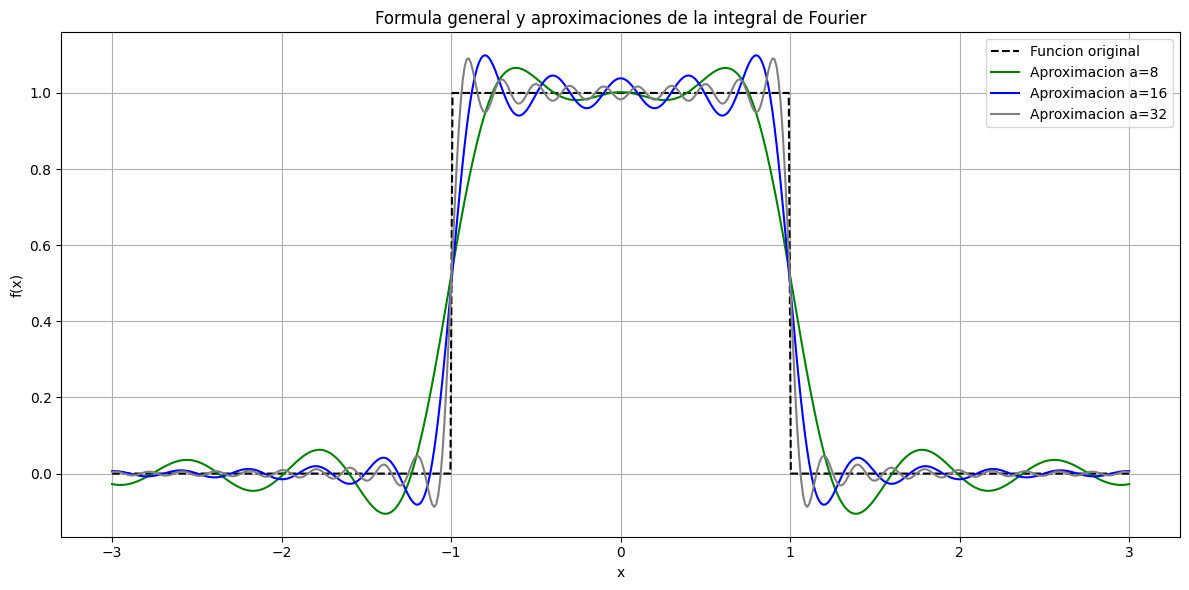

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici

x, v, w = sp.symbols('x v w', real=True)

f_v = sp.Piecewise((1, sp.Abs(v) < 1), (0, True))

A_w = (1 / sp.pi) * sp.integrate(f_v * sp.cos(w * v), (v, -sp.oo, sp.oo))

B_w = (1 / sp.pi) * sp.integrate(f_v * sp.sin(w * v), (v, -sp.oo, sp.oo))

f_general = sp.integrate(A_w * sp.cos(w * x) + B_w * sp.sin(w * x), (w, 0, sp.oo))

f_especifico = sp.integrate(A_w * sp.cos(w * x), (w, 0, sp.oo))
print("\nf(x) especifico (B(w)=0) =", f_especifico)

f_aprox = {
    a: sp.integrate(A_w * sp.cos(w * x), (w, 0, a))
    for a in [8, 16, 32]
}

def Si(val):
    return sici(val)[0]

f_aprox_lambdas = {
    a: sp.lambdify(x, f_aprox[a], modules=[{'Si': Si}, 'numpy'])
    for a in f_aprox
}

x_vals = np.linspace(-3, 3, 500)
f_original = np.where(np.abs(x_vals) < 1, 1, 0)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, f_original, 'k--', label='Funcion original')

colors = {8: 'green', 16: 'blue', 32: 'gray'}
for a, f_lambda in f_aprox_lambdas.items():
    plt.plot(x_vals, f_lambda(x_vals), color=colors[a], label=f'Aproximacion a={a}')

plt.title('Formula general y aproximaciones de la integral de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()